In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = dt.datetime.now() - dt.timedelta(days=3000)
end = dt.datetime.now()
df = pdr.DataReader('BTC-INR', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,2.854223e+04,2.755250e+04,2.844333e+04,2.785164e+04,1282359120,2.785164e+04
2014-09-18,2.782277e+04,2.508574e+04,2.782277e+04,2.577412e+04,2093992320,2.577412e+04
2014-09-19,2.598884e+04,2.336609e+04,2.575365e+04,2.402334e+04,2307413745,2.402334e+04
2014-09-20,2.575756e+04,2.372438e+04,2.401585e+04,2.488181e+04,2243150060,2.488181e+04
2014-09-21,2.509612e+04,2.392506e+04,2.483197e+04,2.426826e+04,1617399085,2.426826e+04
...,...,...,...,...,...,...
2022-09-13,1.795188e+06,1.597057e+06,1.775301e+06,1.615674e+06,4066993383643,1.615674e+06
2022-09-14,1.629189e+06,1.573553e+06,1.606746e+06,1.608237e+06,3009114158391,1.608237e+06
2022-09-15,1.616613e+06,1.567400e+06,1.608332e+06,1.573129e+06,2905639315961,1.573129e+06


In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
close = df.Close.values
close = scaler.fit_transform(close.reshape(-1, 1))
close = close.flatten()
close.shape

(2923,)

In [4]:
closelist = close.tolist()

In [5]:
len(closelist)

2923

In [6]:
a = [1,2,3,4,5,6,7,8,9,10]
b = []
for i in range(len(a)-3+1):
    b.append(a[i:i+3])
b

[[1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10]]

In [7]:
close1 = []
for i in range(len(closelist)-50+1):
    close1.append(closelist[i:i+50])
close1 = np.array(close1)
close1.shape

(2874, 50)

In [8]:
close_y = close1[1:, 0]
close_x = close1[:-1]
close_x.shape, close_y.shape

((2873, 50), (2873,))

In [9]:
close_x = np.expand_dims(close_x, axis=-1)
close_x.shape

(2873, 50, 1)

In [13]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(close_x.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='mse', metrics=['mae', 'accuracy'])

Epoch 1/15
90/90 [==============================] - 21s 120ms/step - loss: 0.0087 - mae: 0.0527 - accuracy: 6.9614e-04
Epoch 2/15
90/90 [==============================] - 11s 118ms/step - loss: 0.0051 - mae: 0.0388 - accuracy: 6.9614e-04
Epoch 3/15
90/90 [==============================] - 11s 119ms/step - loss: 0.0039 - mae: 0.0372 - accuracy: 6.9614e-04
Epoch 4/15
90/90 [==============================] - 11s 118ms/step - loss: 0.0035 - mae: 0.0355 - accuracy: 6.9614e-04
Epoch 5/15
90/90 [==============================] - 11s 118ms/step - loss: 0.0025 - mae: 0.0302 - accuracy: 6.9614e-04
Epoch 6/15
90/90 [==============================] - 11s 119ms/step - loss: 0.0022 - mae: 0.0291 - accuracy: 6.9614e-04
Epoch 7/15
90/90 [==============================] - 11s 118ms/step - loss: 0.0022 - mae: 0.0281 - accuracy: 6.9614e-04
Epoch 8/15
90/90 [==============================] - 11s 118ms/step - loss: 0.0024 - mae: 0.0288 - accuracy: 6.9614e-04
Epoch 9/15
90/90 [==============================

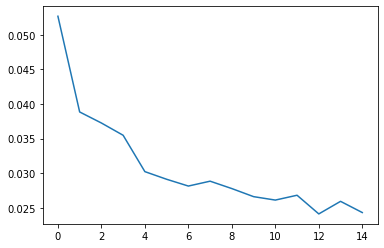

In [15]:
history = model.fit(close_x, close_y, epochs=15, batch_size=32)
plt.plot(history.history['mae']);

In [16]:
model.save('model/Bitcoin50')

INFO:tensorflow:Assets written to: model/Bitcoin50\assets


INFO:tensorflow:Assets written to: model/Bitcoin50\assets


In [23]:
m1 = tf.keras.models.load_model('model/Bitcoin50')

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
inp = scaler.fit_transform(df.Close.values[-50:].reshape(-1, 1))
out = m1.predict(inp.reshape(1, -1, 1))
scaler.inverse_transform(out) # 1897675.8

1/1 [==============================] - 2s 2s/step


array([[1897675.8]], dtype=float32)

In [ ]:
model.evaluate(close_x, close_y)

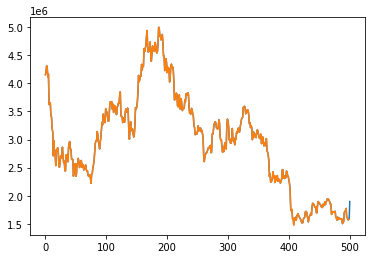

In [22]:
plt.plot(df.Close.values[-500:].tolist()+[1897675.8]);
plt.plot(df.Close.values[-500:].tolist());